## **Capstone Project: Malaria Detection Analysis using Deep Learning**

###<b> Mounting the Drive

In [149]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [150]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
!pip install matplotlib -U # Version Update

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <b>Let us load the data</b>

In [151]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [152]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [153]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [154]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [155]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [156]:
# Shape of images

print('The shape of the training images are', train_images.shape)

print('The shape of the testing images are', test_images.shape)

The shape of the training images are (24958, 64, 64, 3)
The shape of the testing images are (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [157]:
# Shape of labels 

print('The training label shape is', train_labels.shape)

print('The testing label shape is', test_labels.shape)

The training label shape is (24958,)
The testing label shape is (2600,)


**Observations and insights:**
- We can note that there are 24,958 training images and 2,600 testing images (~10%)
- All Data has been converted to be the same shape from lists to arrays
- Data is categorized into two classes of Parasitized and Uninfected

### <b>Check the minimum and maximum range of pixel values for train and test images

In [158]:
# Try to use min and max function from numpy
print('Train Range:', np.min(train_images),'-', np.max(train_images))

print('Test Range:', np.min(test_images),'-', np.max(test_images))

Train Range: 0 - 255
Test Range: 0 - 255


***Observations and insights:***
- We use max and min functions to find the value range of our testing images
- Normal for RGB to be 255


###<b> Count the number of values in both uninfected and parasitized 

In [159]:
# Try to use value_counts to count the values
train_labels_df = pd.DataFrame(train_labels)
test_labels_df = pd.DataFrame(test_labels)

print(train_labels_df.value_counts())
print('0 = Uninfected and 1 = Parasitized')

1    12582
0    12376
dtype: int64
0 = Uninfected and 1 = Parasitized


###<b>Normalize the images

In [160]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255.0).astype('float32')

test_images = (test_images/255.0).astype('float32')

***Observations and insights:***
- Here we are dividing by 255.0 because of image classification, this allows our image to be converted into a value between 0 and 1
- Also the astype function to convert our variable to a float rather than an integer

###<b> Plot to check if the data is balanced

0 = Uninfected
1 = Parasitized


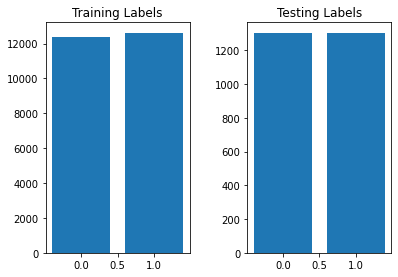

In [161]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
# Must restart runtime to use this cell due to matplotlib update

count_1 = train_labels_df.value_counts()
count_2 = test_labels_df.value_counts()

# print(count_1)
# print(count_2)

unique_train, counts_train = np.unique(train_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)

plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train)
plt.title('Training Labels')
# sns.countplot(data = train_labels_df)

plt.subplot(1, 2, 2)
plt.bar(unique_test, counts_test)
plt.title('Testing Labels')
# sns.countplot(data = count_2, x = test_labels_df)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

print('0 = Uninfected')
print('1 = Parasitized')

plt.show()

***Observations and insights:***
- Bar plots have been used to show balance between our Training and Testing labels
- Roughly 10% of our data is shown in the Testing labels and the distribution is even
- Can conclude from the graphs that our data is in fact balanced between both of our datasets

### <b>Data Exploration</b>
Let's visualize the images from the train data

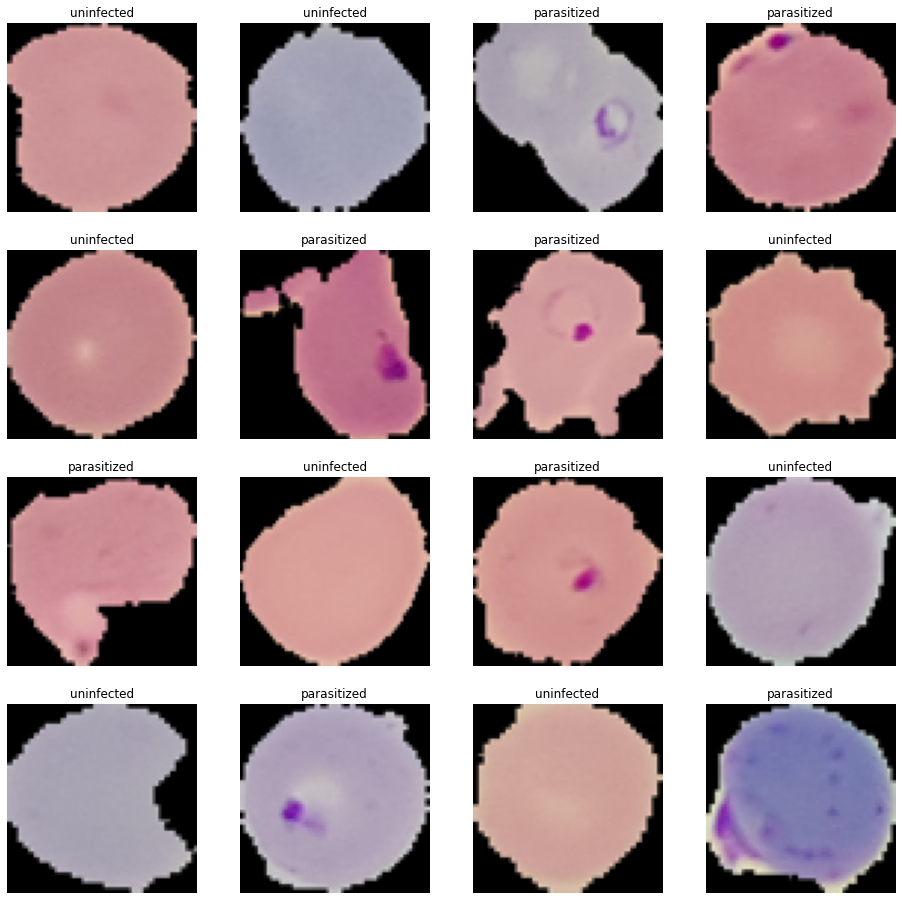

In [162]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

***Observations and insights:***
- Parasitized samples show purple/magenta spots on samples
- Parasitized samples tend to be darker in shade
- Uninfected samples are shown in various forms of cell images
- Subplot size seems to be ideal

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized

In [163]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

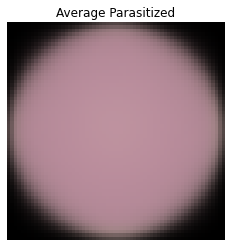

In [164]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

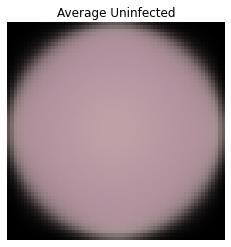

In [165]:
# Similarly write the code to find the mean image of uninfected

uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


***Observations and insights:***
- Averaged Parasitized image is a darker shade of pink than Uninfected
- Average Uninfected image shows gray tint within sample
- For loops are used for taking images and mean function averages images

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [166]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

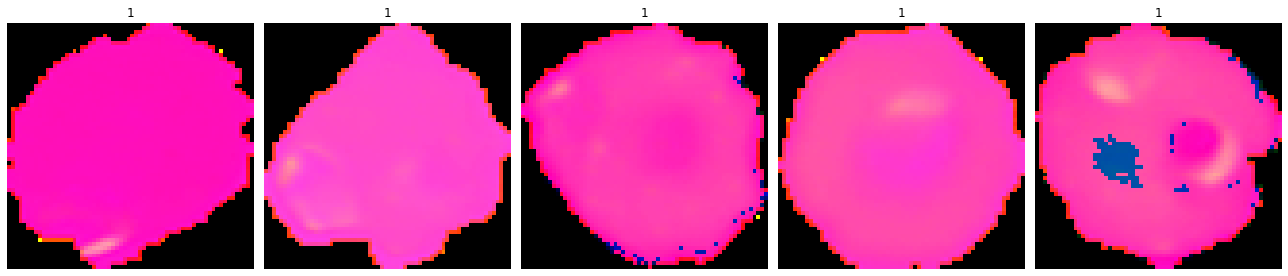

In [167]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

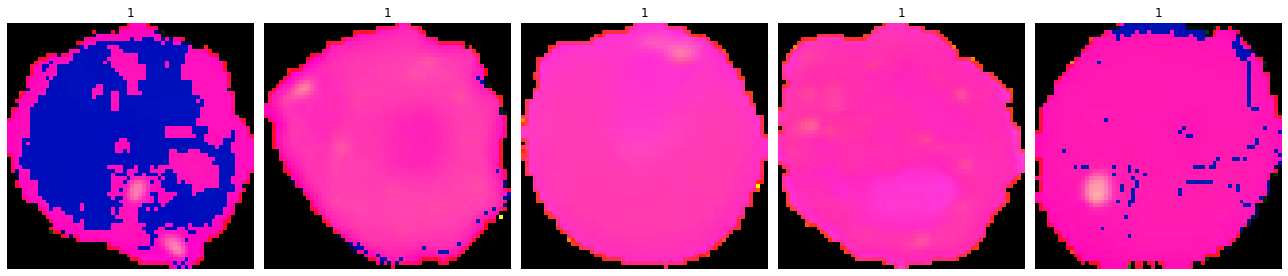

In [168]:
# Similarly you can visualize for the images in the test data

#Converting Test Data
import cv2

gfx_2=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx_2.append(a)

gfx_2 = np.array(gfx_2)

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

***Observations and insights:***
- Converting Images to HSV and showing samples
- Using a similar function to do so with testing labels
- Samples show are all Parasitized samples

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [169]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

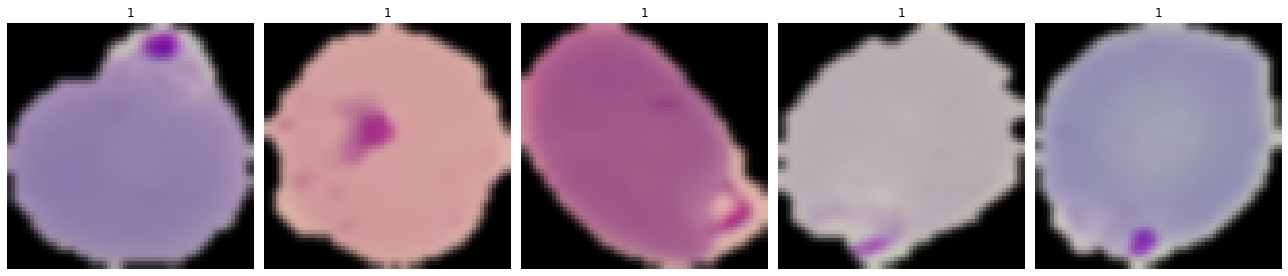

In [170]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [171]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx_2 = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_2.append(b)

gbx_2 = np.array(gbx_2)

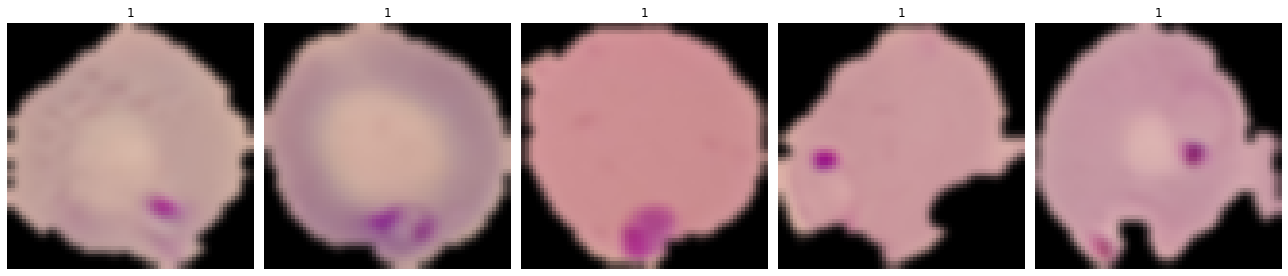

In [172]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx_2[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

***Observations and insights:***
- Blurred images allow us to identify deep purple/magenta spots shown in the samples
- Gaussian blurring allow for noise to be reduced and it implemented instead of mean filtering

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?
- Brightening will make the plasmodium more apparent
- Smoothing (Low pass filtering) may be helpful in averaging out the unnecessary pixels

### **Importing More Libraries**

In [173]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from tensorflow.keras import optimizers

from keras.utils.np_utils import to_categorical

from tensorflow.keras.layers import BatchNormalization

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

###<b> Importing the required libraries for building and training our Model

In [174]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<B>One Hot Encoding on the train and test labels

In [175]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Final Design Model**


In [176]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [177]:
# Creating sequential model
model1 = Sequential()

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.4))

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.6))

model1.add(Dense(256, activation = 'relu'))

model1.add(Dropout(0.6))

model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.6))

model1.add(Dense(2, activation = "sigmoid"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [178]:
adam = optimizers.Adam(learning_rate = 0.001)

model1.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

<b> Using Callbacks

In [179]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [180]:
history1 = model1.fit(train_images, train_labels, batch_size = 64, callbacks = callbacks, validation_split = 0.2, epochs = 40, verbose = 1)

Epoch 1/40
312/312 [==============================] - 5s 14ms/step - loss: 0.4678 - accuracy: 0.7583 - val_loss: 0.0508 - val_accuracy: 0.9948
Epoch 2/40
312/312 [==============================] - 4s 12ms/step - loss: 0.1199 - accuracy: 0.9597 - val_loss: 0.0576 - val_accuracy: 0.9890
Epoch 3/40
312/312 [==============================] - 4s 12ms/step - loss: 0.0990 - accuracy: 0.9675 - val_loss: 0.0474 - val_accuracy: 0.9858
Epoch 4/40
312/312 [==============================] - 4s 12ms/step - loss: 0.0909 - accuracy: 0.9710 - val_loss: 0.0636 - val_accuracy: 0.9760
Epoch 5/40
312/312 [==============================] - 4s 12ms/step - loss: 0.0867 - accuracy: 0.9730 - val_loss: 0.0432 - val_accuracy: 0.9828
Epoch 6/40
312/312 [==============================] - 4s 12ms/step - loss: 0.0826 - accuracy: 0.9733 - val_loss: 0.0338 - val_accuracy: 0.9858
Epoch 7/40
312/312 [==============================] - 4s 12ms/step - loss: 0.0832 - accuracy: 0.9727 - val_loss: 0.0387 - val_accuracy: 0.9830

###<b> Evaluating the model

In [181]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0584 - accuracy: 0.9808

 Test_Accuracy:- 0.9807692170143127


<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1300
           1       0.99      0.97      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



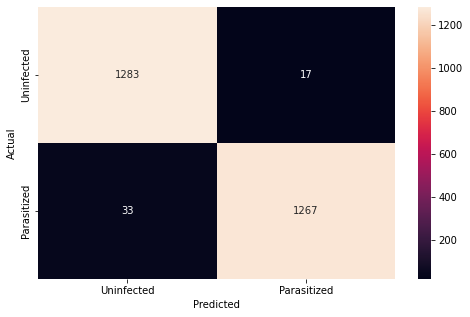

In [182]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred1 = model1.predict(test_images)

pred1 = np.argmax(pred1, axis = 1) 

y_true1 = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true1, pred1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true1, pred1)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [183]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

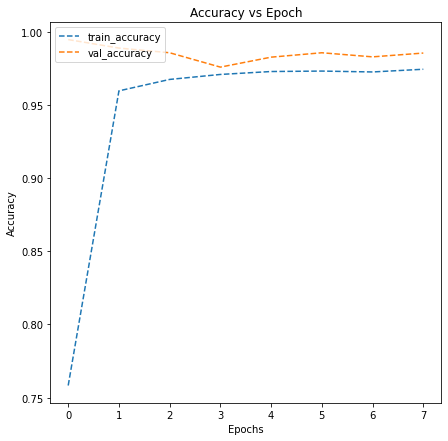

In [184]:
# Plot accuracy between training and validation data using def function
plot_accuracy(history1)

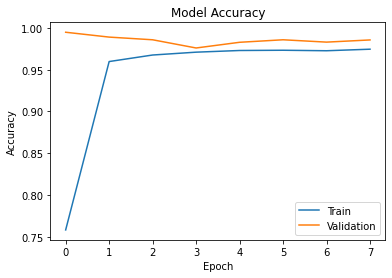

In [185]:
plt.plot(history1.history['accuracy'])

plt.plot(history1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

# Display the plot
plt.show()

## ***Observations and Insights:***
- We observe no overfitting in the training v validation data graph
- Model is consistent after one epoch
- Model shows ~98.1% accuracy
- Errors include Type I (17) and Type II (33) total errors (50)
- Further improvements can include normalizing/augmenting images further to increase accuracy
- 0.97 recall score for parasitized samples was noted but still within bounds so considered acceptable